# **Name:- Shreenidhi Hipparagi**
The dataset includes movement of persons data captured by smartphone users over a period of time.

Before starting any project lets import the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd #data manipulation
import numpy as np # numerical computation
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualiation

In [ ]:
data=pd.read_csv("train.csv")
print("Train set is imported")

Train set is imported


Data is imported and to check if the dataset is correctly imported or not we will check top 5 rows and bottom top 5 rows

In [ ]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,"tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,-0.161343,0.122586,0.984520,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,-0.999635,-0.992605,-0.992934,0.892401,-0.163711,0.094566,0.986770,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.

In [ ]:
test_data=pd.read_csv("test.csv")
print("test data is imported")

test data is imported


In [ ]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,"tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,0.936489,-0.282719,0.115288,-0.925427,-0.937014,-0.564288,-0.930020,-0.937822,-0.605588,0.906083,-0.279244,0.152895,0.944461,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,0.927404,-0.289215,0.152568,-0.989057,-0.983887,-0.964781,-0.989000,-0.983159,-0.965206,0.856176,-0.304870,0.152895,0.944461,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,0.929915,-0.287513,0.146086,-0.995937,-0.988251,-0.981580,-0.995976,-0.988629,-0.980255,0.856269,-0.304870,0.139454,0.948704,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.1688

#**Lets check the shape of the data**

In [ ]:
data.shape

(7352, 550)

In [ ]:
test_data.shape

(2947, 550)

Check for null values

In [ ]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
Person                  0
Work                    0
Length: 550, dtype: int64

In [ ]:
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
Person                  0
Work                    0
Length: 550, dtype: int64

Lets check the values in target variable

In [ ]:
data['Work'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
data_standing=data[data['Work']=='STANDING']

In [ ]:
data_standing.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,"tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,-0.161343,0.122586,0.984520,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,-0.999635,-0.992605,-0.992934,0.892401,-0.163711,0.094566,0.986770,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


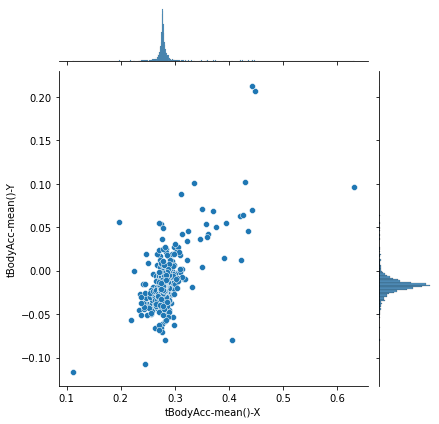

In [ ]:
sns.jointplot(data_standing['tBodyAcc-mean()-X'],data_standing['tBodyAcc-mean()-Y'])

In [ ]:
standing_range=data_standing['tBodyAcc-mean()-X'].max() - data_standing['tBodyAcc-mean()-X'].min()
print("Range of standing work when tBodyAcc-mean()-X is taken into account {}".format(standing_range))

Range of standing work when tBodyAcc-mean()-X is taken into account 0.52027884


In [ ]:
q3=data_standing['tBodyAcc-mean()-X'].quantile(0.75)
q1=data_standing['tBodyAcc-mean()-X'].quantile(0.25)
iqr=q3-q1
print(iqr)

0.005347209999999991


In [ ]:
outliers_q1= q1-1.5*iqr
print(outliers_q1)

0.26693091


In [ ]:
outliers_q3=q3+1.5*iqr
print(outliers_q3)

0.28831975


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


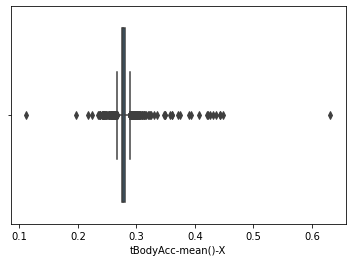

In [ ]:
sns.boxplot(data_standing['tBodyAcc-mean()-X'])

In [ ]:
data_standing['tBodyAcc-mean()-X'].skew()

6.891138718740828

In [ ]:
data_sitting=data[data['Work']=='SITTING']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


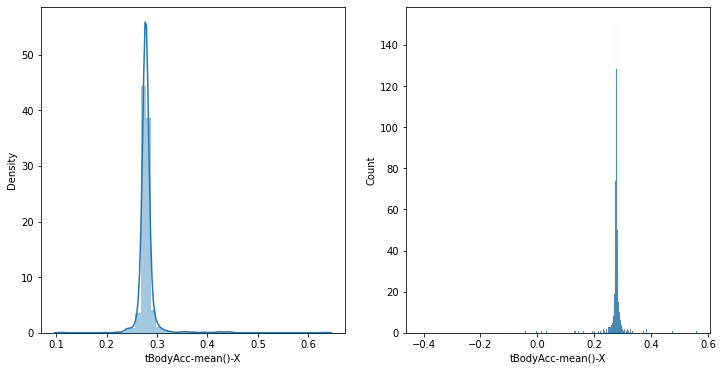

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1),
sns.distplot(data_standing['tBodyAcc-mean()-X'])
plt.subplot(1,2,2)
sns.histplot(data_sitting['tBodyAcc-mean()-X'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


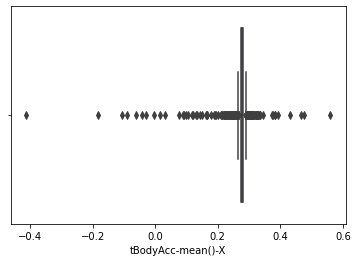

In [ ]:
sns.boxplot(data_sitting['tBodyAcc-mean()-X'])

Body acceleration mean x has more values in the range of 0.25 to 0.3 while STANDING and while sitting the values are in the range of 0.2 to 0.25

In [ ]:
divide_data1=data.iloc[:,:10]
divide_data1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469
...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702


In [ ]:
data.shape,test_data.shape

((7352, 550), (2947, 550))

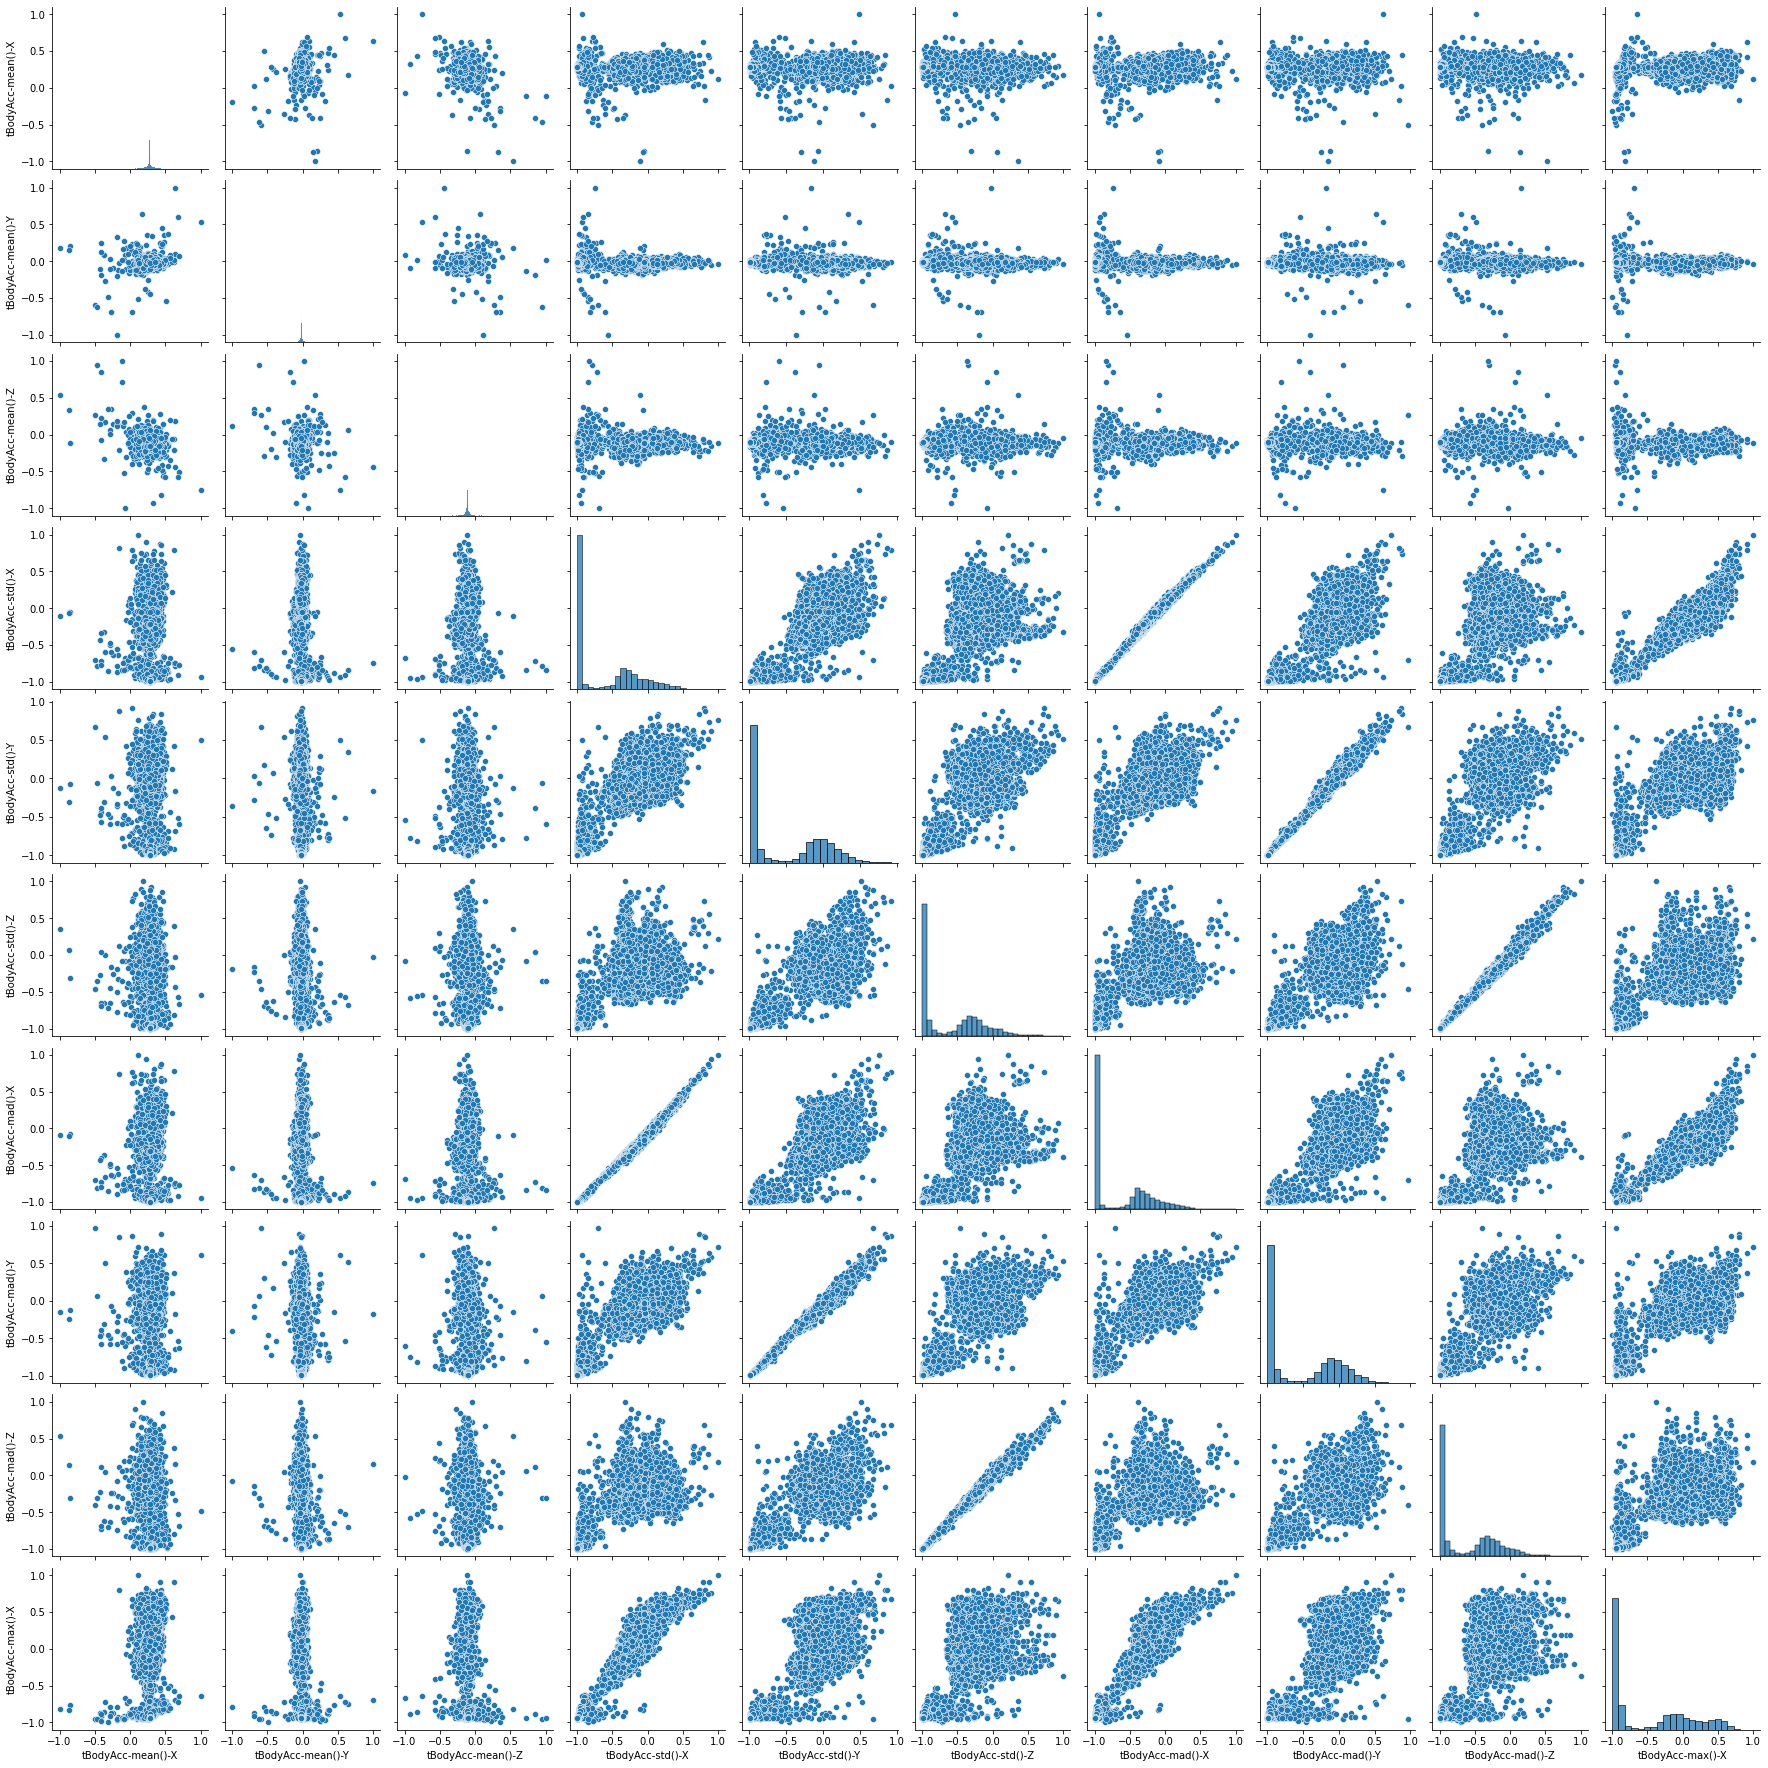

In [ ]:
sns.pairplot(divide_data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


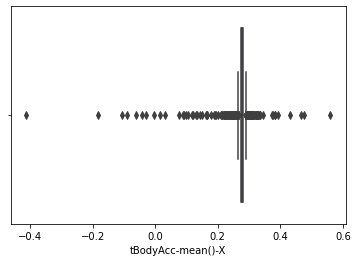

In [ ]:
data_laying=data[data['Work']=='LAYING']
sns.boxplot(data_sitting['tBodyAcc-mean()-X'])

In [ ]:
data.Work.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


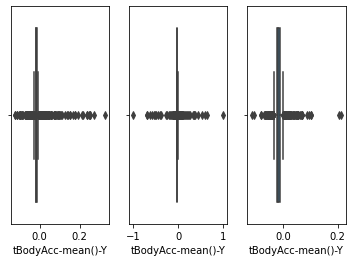

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data_sitting['tBodyAcc-mean()-Y'])
plt.subplot(1,3,2)
sns.boxplot(data_laying['tBodyAcc-mean()-Y'])
plt.subplot(1,3,3)
sns.boxplot(data_standing['tBodyAcc-mean()-Y'])

In [ ]:
divide_data1.max(),divide_data1.min()

(tBodyAcc-mean()-X    1.000000
 tBodyAcc-mean()-Y    1.000000
 tBodyAcc-mean()-Z    0.948795
 tBodyAcc-std()-X     1.000000
 tBodyAcc-std()-Y     0.916238
 tBodyAcc-std()-Z     1.000000
 tBodyAcc-mad()-X     1.000000
 tBodyAcc-mad()-Y     0.967664
 tBodyAcc-mad()-Z     1.000000
 tBodyAcc-max()-X     1.000000
 dtype: float64, tBodyAcc-mean()-X   -1.000000
 tBodyAcc-mean()-Y   -1.000000
 tBodyAcc-mean()-Z   -1.000000
 tBodyAcc-std()-X    -1.000000
 tBodyAcc-std()-Y    -0.999873
 tBodyAcc-std()-Z    -1.000000
 tBodyAcc-mad()-X    -1.000000
 tBodyAcc-mad()-Y    -1.000000
 tBodyAcc-mad()-Z    -0.999879
 tBodyAcc-max()-X    -0.971348
 dtype: float64)

In [ ]:
divide_data2=data.iloc[:,10:40]

In [ ]:
divide_data2.max(),divide_data2.min()

(tBodyAcc-max()-Y              1.000000
 tBodyAcc-max()-Z              1.000000
 tBodyAcc-min()-X              1.000000
 tBodyAcc-min()-Y              1.000000
 tBodyAcc-min()-Z              0.972359
 tBodyAcc-sma()                1.000000
 tBodyAcc-energy()-X           1.000000
 tBodyAcc-energy()-Y           1.000000
 tBodyAcc-arCoeff()-Y,3        1.000000
 tBodyAcc-arCoeff()-Y,4        1.000000
 tBodyAcc-arCoeff()-Z,1        0.809189
 tBodyAcc-arCoeff()-Z,2        1.000000
 tBodyAcc-arCoeff()-Z,3        0.997207
 tBodyAcc-arCoeff()-Z,4        1.000000
 tBodyAcc-correlation()-X,Y    1.000000
 tBodyAcc-correlation()-X,Z    1.000000
 tBodyAcc-correlation()-Y,Z    0.999513
 tGravityAcc-mean()-X          0.991549
 tGravityAcc-mean()-Y          1.000000
 tGravityAcc-mean()-Z          1.000000
 tGravityAcc-std()-X           1.000000
 tGravityAcc-std()-Y           1.000000
 tGravityAcc-std()-Z           1.000000
 tGravityAcc-mad()-X           1.000000
 tGravityAcc-mad()-Y           1.000000


In [ ]:
divide_data3=data.iloc[:,40:100]
divide_data3.max(),divide_data3.min()

(tGravityAcc-min()-Y              1.000000
 tGravityAcc-min()-Z              1.000000
 tGravityAcc-sma()                1.000000
 tGravityAcc-energy()-X           0.975855
 tGravityAcc-energy()-Y           1.000000
 tGravityAcc-energy()-Z           0.955530
 tGravityAcc-iqr()-X              1.000000
 tGravityAcc-iqr()-Y              1.000000
 tGravityAcc-iqr()-Z              1.000000
 tGravityAcc-entropy()-X          1.000000
 tGravityAcc-entropy()-Y          1.000000
 tGravityAcc-entropy()-Z          1.000000
 tGravityAcc-arCoeff()-X,1        1.000000
 tGravityAcc-arCoeff()-X,2        1.000000
 tGravityAcc-arCoeff()-X,3        1.000000
 tGravityAcc-arCoeff()-X,4        1.000000
 tGravityAcc-arCoeff()-Y,1        0.813170
 tGravityAcc-arCoeff()-Y,2        1.000000
 tGravityAcc-arCoeff()-Y,3        1.000000
 tGravityAcc-arCoeff()-Y,4        1.000000
 tGravityAcc-arCoeff()-Z,1        0.648774
 tGravityAcc-arCoeff()-Z,2        0.999175
 tGravityAcc-arCoeff()-Z,3        0.585769
 tGravityAc

In [ ]:
data.max()>1

tBodyAcc-mean()-X                       False
tBodyAcc-mean()-Y                       False
tBodyAcc-mean()-Z                       False
tBodyAcc-std()-X                        False
tBodyAcc-std()-Y                        False
                                        ...  
angle(tBodyGyroJerkMean,gravityMean)    False
angle(X,gravityMean)                    False
angle(Y,gravityMean)                    False
angle(Z,gravityMean)                    False
Person                                   True
Length: 549, dtype: bool

In [ ]:
data['Person'].value_counts()

21.0    408
23.0    372
17.0    368
16.0    366
19.0    360
1.0     347
3.0     341
15.0    328
6.0     325
14.0    323
22.0    321
11.0    316
7.0     308
5.0     302
8.0     281
25.0    187
Name: Person, dtype: int64

In [ ]:
dat=data.max()>1

In [ ]:
dat

tBodyAcc-mean()-X                       False
tBodyAcc-mean()-Y                       False
tBodyAcc-mean()-Z                       False
tBodyAcc-std()-X                        False
tBodyAcc-std()-Y                        False
                                        ...  
angle(tBodyGyroJerkMean,gravityMean)    False
angle(X,gravityMean)                    False
angle(Y,gravityMean)                    False
angle(Z,gravityMean)                    False
Person                                   True
Length: 549, dtype: bool

In [ ]:
x=data.drop(['Work'],axis=1)
y=data['Work']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=7)
ytrain=ytrain.astype('str')
ytest=ytest.astype('str')

In [ ]:
xtest=xtest.interpolate(method='linear',limit_direction='forward')
xtest.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Person                                  0
Length: 549, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)
ytest

array([5, 2, 5, ..., 3, 3, 4])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knc=KNeighborsClassifier(n_neighbors=9)
knc.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
ypred=knc.predict(xtest)

In [ ]:

from sklearn.metrics import f1_score
f1_score(ytest,ypred,average='weighted')

0.9591743332778199

In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4203 entries, 2837 to 4271
Columns: 549 entries, tBodyAcc-mean()-X to Person
dtypes: float64(549)
memory usage: 17.6 MB


In [ ]:
xtrain.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    1
angle(X,gravityMean)                    1
angle(Y,gravityMean)                    1
angle(Z,gravityMean)                    1
Person                                  1
Length: 549, dtype: int64

In [ ]:
null=xtrain.isnull().sum()>=1

In [ ]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    1
angle(Y,gravityMean)    1
angle(Z,gravityMean)    1
Person                  1
Work                    1
Length: 550, dtype: int64

In [ ]:
data.isnull().any()

tBodyAcc-mean()-X       False
tBodyAcc-mean()-Y       False
tBodyAcc-mean()-Z       False
tBodyAcc-std()-X        False
tBodyAcc-std()-Y        False
                        ...  
angle(X,gravityMean)     True
angle(Y,gravityMean)     True
angle(Z,gravityMean)     True
Person                   True
Work                     True
Length: 550, dtype: bool

In [ ]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,"tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person
count,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,...,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000
mean,0.273816,-0.017679,-0.109397,-0.594300,-0.486026,-0.591060,-0.618671,-0.502970,-0.593311,-0.463568,-0.295135,-0.551997,0.508690,0.371202,0.582623,-0.531153,-0.811134,-0.892313,0.157427,-0.022899,-0.000360,0.039811,0.040730,-0.095549,-0.118273,-0.198936,0.112400,0.667757,0.004049,0.074023,-0.961914,-0.952575,-0.936328,-0.962708,-0.953538,-0.937683,0.608759,-0.009809,0.079324,0.681313,...,-0.661059,-0.327681,-0.876974,0.177970,-0.310284,-0.613343,-0.675743,-0.686478,-0.664587,-0.721817,-0.875313,-0.675766,-0.865786,-0.702429,-0.066994,-0.890690,-0.026910,-0.259459,-0.568607,-0.759926,-0.774855,-0.753637,-0.795083,-0.860710,-0.759926,-0.924185,-0.751455,-0.260371,-0.901184,0.132216,-0.300263,-0.618623,0.008929,-0.001298,0.008899,-0.002724,-0.481196,0.061458,-0.044245,13.319056
std,0.073723,0.042394,0.054205,0.458367,0.525690,0.434412,0.434559,0.508430,0.427376,0.547880,0.292476,0.297513,0.377298,0.359390,0.315903,0.486195,0.272665,0.137796,0.209844,0.220760,0.284542,0.218140,0.235519,0.229913,0.378006,0.347646,0.392807,0.498433,0.380003,0.351219,0.084899,0.096169,0.108095,0.083829,0.095183,0.10694

In [ ]:
data['angle(X,gravityMean)'].unique()

array([-0.84124676, -0.8447876 , -0.84893347, ..., -0.72776266,
       -0.70227068,         nan])

In [ ]:
xtrain=xtrain.interpolate(method='linear',limit_direction='forward')
xtrain.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Person                                  0
Length: 549, dtype: int64

In [ ]:
test_x=test_data.drop(['Work'],axis=1)
test_y=test_data['Work']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(test_x,test_y,test_size=0.2,random_state=7)
ytrain=ytrain.astype('str')
ytest=ytest.astype('str')

In [ ]:
xtest=xtest.interpolate(method='linear',limit_direction='forward')
xtest.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Person                                  0
Length: 549, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)
ytest

array([1, 5, 0, 2, 5, 4, 2, 2, 5, 4, 5, 5, 0, 5, 2, 4, 2, 0, 3, 1, 2, 1,
       3, 2, 4, 5, 1, 5, 3, 3, 4, 2, 1, 1, 1, 4, 4, 4, 1, 3, 5, 0, 1, 0,
       1, 0, 0, 1, 4, 4, 1, 2, 3, 4, 1, 3, 2, 0, 5, 4, 4, 3, 5, 2, 1, 5,
       1, 1, 0, 0, 1, 3, 4, 3, 2, 2, 1, 1, 5, 0, 5, 0, 2, 2, 2, 5, 3, 1,
       4, 4, 2, 2, 5, 2, 0, 2, 3, 0, 4, 4, 1, 3, 2, 1, 0, 4, 5, 1, 3, 4,
       5, 0, 0, 2, 2, 0, 4, 4, 1, 5, 0, 4, 2, 3, 0, 5, 1, 2, 3, 4, 0, 1,
       0, 1, 3, 2, 3, 2, 2, 5, 1, 2, 1, 5, 5, 5, 1, 5, 0, 5, 4, 0, 0, 3,
       0, 2, 3, 2, 0, 5, 0, 5, 0, 4, 0, 5, 3, 2, 0, 3, 5, 3, 0, 5, 0, 1,
       3, 2, 1, 0, 2, 0, 4, 2, 1, 0, 2, 4, 4, 5, 4, 0, 3, 1, 4, 5, 1, 5,
       1, 4, 4, 5, 4, 5, 1, 2, 3, 2, 2, 2, 1, 2, 2, 0, 4, 5, 4, 3, 0, 0,
       3, 3, 4, 5, 3, 3, 0, 5, 0, 2, 0, 1, 1, 3, 1, 3, 2, 1, 1, 3, 2, 5,
       4, 0, 5, 0, 2, 4, 0, 5, 5, 4, 0, 5, 0, 1, 0, 0, 0, 2, 5, 5, 4, 1,
       5, 2, 0, 1, 3, 4, 0, 1, 5, 4, 2, 3, 4, 5, 3, 4, 2, 2, 0, 2, 4, 4,
       4, 0, 2, 5, 1, 2, 4, 5, 1, 0, 3, 5, 5, 4, 4,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knc=KNeighborsClassifier(n_neighbors=9)
knc.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
ypred2=knc.predict(xtest)

In [ ]:
f1_score(ypred2,ytest,average='weighted')

0.9577681239277037

In [ ]:
knc.score(xtest,ytest),knc.score(xtrain,ytrain)

(0.9576271186440678, 0.9736953754773017)